In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn


# controlar as notificações
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# importar Seaborn biblioteca de gráficos
import seaborn as sns

sns.set_theme(
    context="notebook",
    style="white",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
)

%config InlineBackend.figure_format = 'retina' # Make visualizations look good
# %config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
credito = pd.read_csv("Credit.csv")
credito.shape

(1000, 21)

In [3]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
for col in credito.columns:
    if credito[col].dtype == "object":
        credito[col] = credito[col].astype("category").cat.codes

In [5]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1,0


In [6]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [7]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    previsores, classe, test_size=0.3, random_state=123
)

In [8]:
# def treina_rf(n_estimators):
#     mlflow.set_experiment("rfexperimento")
#     with mlflow.start_run():
#         modelorf = RandomForestClassifier(n_estimators=n_estimators)
#         modelorf.fit(X_treinamento, y_treinamento)
#         previsoes = modelorf.predict(X_teste)

#         # log de hiper parametros
#         mlflow.log_param("n_estimators", n_estimators)

#         # métricas
#         acuracia = accuracy_score(y_teste, previsoes)
#         recall = recall_score(y_teste, previsoes)
#         precision = precision_score(y_teste, previsoes)
#         f1 = f1_score(y_teste, previsoes)
#         auc = roc_auc_score(y_teste, previsoes)
#         log = log_loss(y_teste, previsoes)

#         # registrar métricas
#         mlflow.log_metric("acuracia", acuracia)
#         mlflow.log_metric("recall", recall)
#         mlflow.log_metric("precision", precision)
#         mlflow.log_metric("f1", f1)
#         mlflow.log_metric("auc", auc)
#         mlflow.log_metric("log", log)

#         # gráficos
#         confusion = plot_confusion_matrix(modelorf, X_teste, y_teste).plot()
#         plt.savefig("confusionrf.png")
#         roc = plot_roc_curve(modelorf, X_teste, y_teste).plot()
#         plt.savefig("rocfr.png")

#         # logar gráficos
#         mlflow.log_artifact("confusionrf.png")
#         mlflow.log_artifact("rocfr.png")

#         # modelo
#         mlflow.sklearn.log_model(modelorf, "ModeloNB")

#         # informações da execução
#         print("Modelo: ", mlflow.active_run().info.run_uuid)

#     mlflow.end_run()

In [14]:
from pathlib import Path

# Crie um objeto Path com o caminho desejado
caminho = Path('C:/users/carlo/Projetos')

# Verifique se o diretório já existe
if not caminho.exists():
    caminho.mkdir()
    print(f'Diretório {caminho} criado com sucesso!')
else:
    print(f'Diretório {caminho} já existe.')


Diretório C:\users\carlo\Projetos já existe.


In [ ]:
import sys
diretorio_atual = sys.path[0]
print(diretorio_atual)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve


def treina_rf(n_estimators):
    mlflow.set_experiment("rfexperimento")
    with mlflow.start_run():
        modelorf = RandomForestClassifier(n_estimators=n_estimators)
        modelorf.fit(X_treinamento, y_treinamento)
        previsoes = modelorf.predict(X_teste).round()

        # log de hiper parametros
        mlflow.log_param("n_estimators", n_estimators)

        # métricas
        acuracia = accuracy_score(y_teste, previsoes)
        recall = recall_score(y_teste, previsoes)
        precision = precision_score(y_teste, previsoes)
        f1 = f1_score(y_teste, previsoes)
        auc = roc_auc_score(y_teste, previsoes)
        log = log_loss(y_teste, previsoes)

        # registrar métricas
        mlflow.log_metric("acuracia", acuracia)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("f1", f1)
        mlflow.log_metric("auc", auc)
        mlflow.log_metric("log", log)

        # # gráficos
        cm = confusion_matrix(y_teste, previsoes, labels=modelorf.classes_)
        cm_display = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=modelorf.classes_
        ).plot()
        plt.savefig("cm_display.png")

        fpr, tpr, _ = roc_curve(y_teste, previsoes)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        plt.savefig("roc_display.png")

        # logar gráficos
        mlflow.log_artifact(diretorio_atual, artifact_path=diretorio_atual+"cm_display.png")
        mlflow.log_artifact(diretorio_atual, artifact_path=diretorio_atual+"roc_display.png")

        # modelo
        mlflow.sklearn.log_model(modelorf, "ModeloNB")

        # informações da execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)

    mlflow.end_run()


In [10]:
# confusion.plot()

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'D:\\'

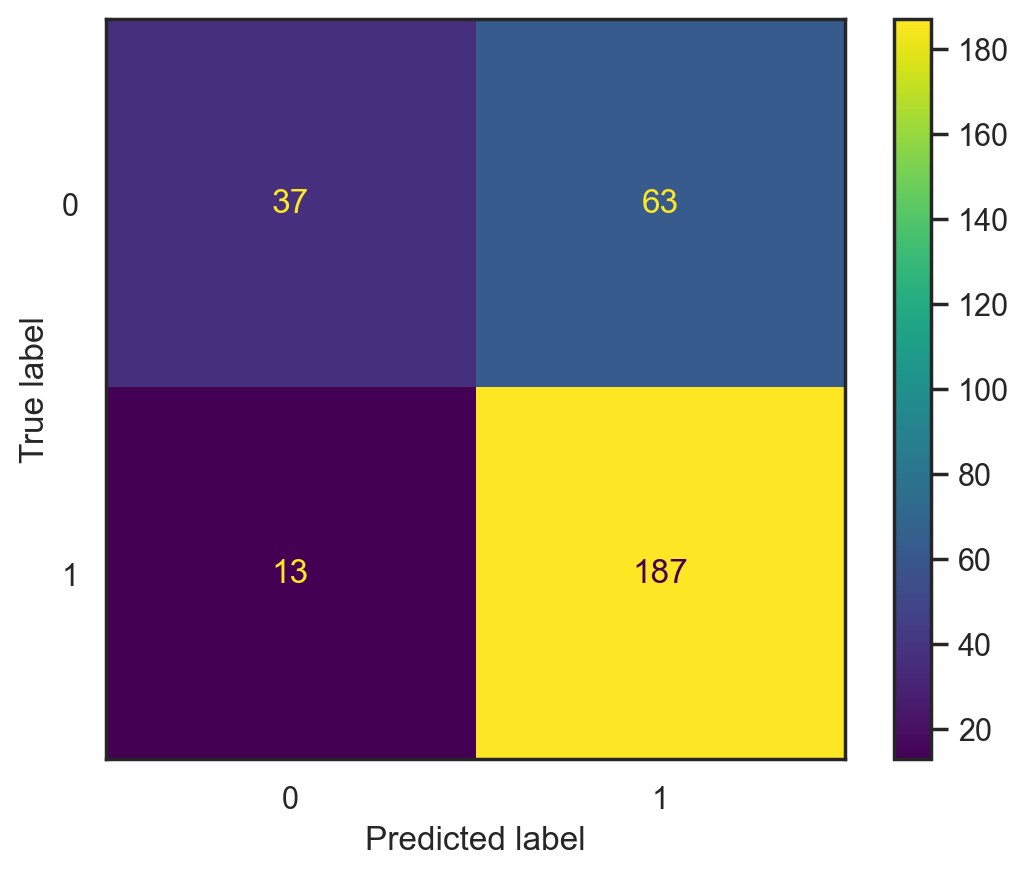

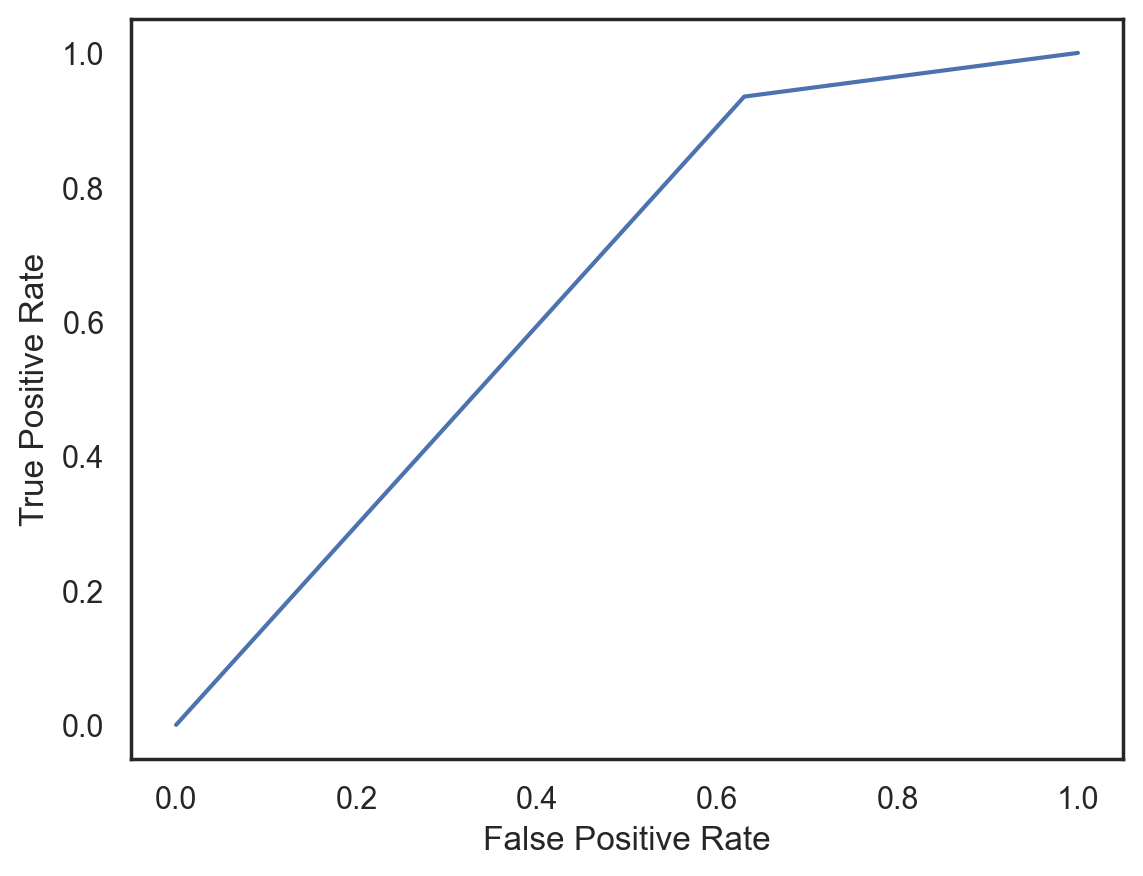

In [16]:
arvores = [50, 100, 500, 750, 1000]
for n in arvores:
    treina_rf(n)